In [3]:
DESTINATIONS = [
    ("Jakarta", "Surabaya", 75),
    ("Jakarta", "Bali", 120),
    ("Surabaya", "Medan", 150),
    ("Medan", "Jakarta", 100),
    ("Bali", "Surabaya", 90),
    ("Surabaya", "Makassar", 130),
    ("Jakarta", "Medan", 110),
    ("Bali", "Jakarta", 95)
]


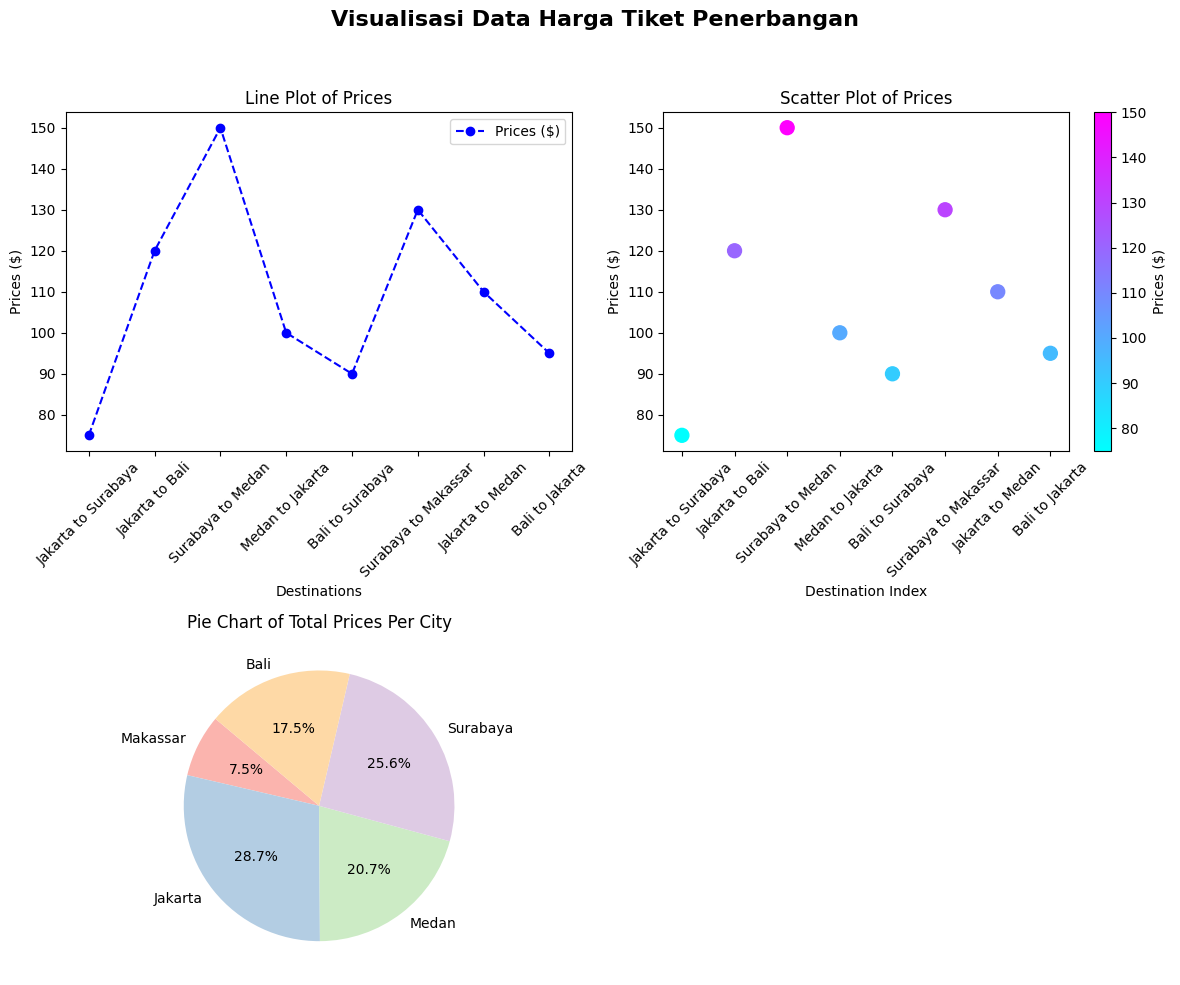

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data preparation
destinations = [f"{start} to {end}" for start, end, _ in DESTINATIONS]
prices = [price for _, _, price in DESTINATIONS]
cities = list(set([start for start, _, _ in DESTINATIONS] + [end for _, end, _ in DESTINATIONS]))

# Generate data for scatter plot
x_scatter = np.arange(len(destinations))
y_scatter = prices

# Calculate total prices per city for pie chart
city_totals = {city: 0 for city in cities}
for start, end, price in DESTINATIONS:
    city_totals[start] += price
    city_totals[end] += price

# Pie chart data
labels = city_totals.keys()
sizes = city_totals.values()

# Plotting with subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Visualisasi Data Harga Tiket Penerbangan", fontsize=16, fontweight='bold')

# Line plot
axes[0, 0].plot(destinations, prices, color="blue", marker="o", linestyle="--", label="Prices ($)")
axes[0, 0].set_title("Line Plot of Prices")
axes[0, 0].set_xlabel("Destinations")
axes[0, 0].set_ylabel("Prices ($)")
axes[0, 0].tick_params(axis="x", rotation=45)
axes[0, 0].legend()

# Scatter plot
scatter = axes[0, 1].scatter(x_scatter, y_scatter, c=y_scatter, cmap="cool", s=100)
axes[0, 1].set_title("Scatter Plot of Prices")
axes[0, 1].set_xlabel("Destination Index")
axes[0, 1].set_ylabel("Prices ($)")
axes[0, 1].set_xticks(x_scatter)
axes[0, 1].set_xticklabels(destinations, rotation=45)
fig.colorbar(scatter, ax=axes[0, 1], label="Prices ($)")

# Pie chart
axes[1, 0].pie(sizes, labels=labels, autopct="%1.1f%%", startangle=140, colors=plt.cm.Pastel1.colors)
axes[1, 0].set_title("Pie Chart of Total Prices Per City")

# Hide unused subplot
axes[1, 1].axis("off")

# Adjust layout and show
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


DEMO 2


In [19]:
import os

# Cek apakah file ada
file_path = 'Dataset Harga Buah dan Sayur.csv'
if os.path.exists(file_path):
    print("File ditemukan!")
else:
    print("File tidak ditemukan.")

File ditemukan!


In [20]:
import pandas as pd

data = pd.read_csv('Dataset Harga Buah dan Sayur.csv')

print(data.head(10))

    category              item            variety        date  price unit
0      fruit            apples  bramleys_seedling  2022-03-11   2.05   kg
1      fruit            apples  coxs_orange_group  2022-03-11   1.22   kg
2      fruit            apples    egremont_russet  2022-03-11   1.14   kg
3      fruit            apples           braeburn  2022-03-11   1.05   kg
4      fruit            apples               gala  2022-03-11   1.03   kg
5      fruit            apples  other_late_season  2022-03-11   0.85   kg
6      fruit             pears         conference  2022-03-11   0.77   kg
7      fruit             pears  doyenne_du_comice  2022-03-11   1.24   kg
8  vegetable          beetroot           beetroot  2022-03-11   0.52   kg
9  vegetable  brussels_sprouts   brussels_sprouts  2022-03-11   0.78   kg


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9647 entries, 0 to 9646
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  9647 non-null   object 
 1   item      9647 non-null   object 
 2   variety   9647 non-null   object 
 3   date      9647 non-null   object 
 4   price     9647 non-null   float64
 5   unit      9647 non-null   object 
dtypes: float64(1), object(5)
memory usage: 452.3+ KB


In [ ]:

data['year'] = pd.to_datetime(data['date']).dt.year

average_price_per_year = data.groupby(['year', 'item'])['price'].mean().reset_index()

print(average_price_per_year)


     year              item     price
0    2017       alstromeria  0.275000
1    2017            apples  0.765490
2    2017          beetroot  0.483750
3    2017  brussels_sprouts  0.681250
4    2017           cabbage  0.408500
..    ...               ...       ...
239  2022           rhubarb  4.910769
240  2022     spring_greens  1.027000
241  2022             swede  0.238000
242  2022            tulips  0.270000
243  2022            turnip  1.319000

[244 rows x 3 columns]


In [17]:
# Produk dengan harga tertinggi
highest_price_product = data.loc[data['price'].idxmax()]

# Produk dengan harga terendah
lowest_price_product = data.loc[data['price'].idxmin()]

print("Produk dengan harga tertinggi:")
print(highest_price_product)

print("\nProduk dengan harga terendah:")
print(lowest_price_product)


Produk dengan harga tertinggi:
category          fruit
item        raspberries
variety     raspberries
date         2021-05-21
price              17.6
unit                 kg
Name: 1805, dtype: object

Produk dengan harga terendah:
category    cut_flowers
item          narcissus
variety         outdoor
date         2018-04-27
price              0.02
unit               stem
Name: 8743, dtype: object


In [16]:
filtered_data = data[(data['price'] >= 1.50) & (data['price'] <= 2.35)]
print(filtered_data)

       category        item            variety        date  price unit
0         fruit      apples  bramleys_seedling  2022-03-11   2.05   kg
32        fruit      apples  bramleys_seedling  2022-03-04   1.89   kg
65        fruit      apples  bramleys_seedling  2022-02-25   1.90   kg
66        fruit      apples  coxs_orange_group  2022-02-25   1.50   kg
98        fruit      apples  bramleys_seedling  2022-02-18   1.97   kg
...         ...         ...                ...         ...    ...  ...
9553  vegetable  curly_kale         curly_kale  2017-11-10   1.68   kg
9584  vegetable    tomatoes               vine  2017-11-10   1.60   kg
9608  vegetable  curly_kale         curly_kale  2017-11-03   1.50   kg
9622  vegetable   coriander          coriander  2017-11-03   2.21   kg
9640  vegetable    tomatoes               vine  2017-11-03   1.54   kg

[930 rows x 6 columns]
